In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sqlite3 as sql

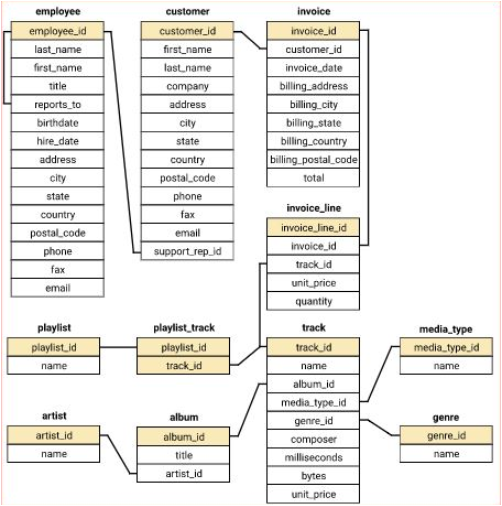

* this is database, it have single or multiple table
* this is digitle music store
* it have customer,employeem,genre and multiple table, 
* toatal 11 tables which mean 11 data set

In [2]:
con=sql.connect("chinook.db")

In [3]:
def read_sql(q):
    return pd.read_sql_query(q,con)
    

In [45]:
q = """select * from sqlite_master"""
read_sql(q)

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


In [ ]:
q="""select * from invoice"""
read_sql(q)

In [ ]:
q="""select * from invoice_line"""
read_sql(q)

In [ ]:
q="""select * from invoice_line where invoice_id=1"""
read_sql(q)

In [ ]:
q="""select i.invoice_id,i.billing_address from invoice i"""
read_sql(q)

In [ ]:
q="""select i.invoice_id,i.billing_address from invoice i 
        inner join invoice_line il
        on i.invoice_id=il.invoice_id"""
read_sql(q)

In [ ]:
q="""select i.invoice_id,i.billing_address,il.track_id,il.unit_price from invoice i 
        inner join invoice_line il
        on i.invoice_id=il.invoice_id"""
read_sql(q)

In [ ]:
q="""select i.invoice_id,i.billing_address,il.track_id,il.unit_price from invoice i 
        inner join invoice_line il
        on i.invoice_id=il.invoice_id where i.invoice_id=1"""
read_sql(q)

In [ ]:
q="""pragma table_info(invoice)"""
read_sql(q)

# find the title of album and the name of artist and find the sale tracke of that album

* album name 
* artist name 
* sold track

In [ ]:
q = """select alb.title Album_Title, ar.name Artist_Name,
        il.track_id 
        from artist ar
        left join album alb
        on
        alb.artist_id=ar.artist_id 
        inner join track t 
        on 
        t.album_id=alb.album_id 
        inner join invoice_line il on 
        t.track_id=il.track_id"""
read_sql(q)

In [ ]:
q = """select alb.title Album_Title, ar.name Artist_Name,
        il.track_id 
        from artist ar
        left join album alb
        on
        alb.artist_id=ar.artist_id 
        inner join track t 
        on 
        t.album_id=alb.album_id 
        inner join invoice_line il on 
        t.track_id=il.track_id 
        group by 1 """
read_sql(q)

In [ ]:
q = """select alb.title Album_Title, ar.name Artist_Name,
        count(il.track_id) No_Purchased 
        from artist ar
        left join album alb
        on
        alb.artist_id=ar.artist_id 
        inner join track t 
        on 
        t.album_id=alb.album_id 
        inner join invoice_line il on 
        t.track_id=il.track_id 
        group by 1 """
read_sql(q)

In [ ]:
q = """select ar.name Artist_Name,alb.title Album_Title,
        count(il.track_id) No_Purchased 
        from artist ar
        left join album alb
        on
        alb.artist_id=ar.artist_id 
        inner join track t 
        on 
        t.album_id=alb.album_id 
        inner join invoice_line il on 
        t.track_id=il.track_id 
        group by 2 """
read_sql(q)

In [ ]:
q = """select ar.name Artist_Name,alb.title Album_Title,
        count(il.track_id) No_Purchased 
        from artist ar
        left join album alb
        on
        alb.artist_id=ar.artist_id 
        inner join track t 
        on 
        t.album_id=alb.album_id 
        inner join invoice_line il on 
        t.track_id=il.track_id 
        group by Album_Title"""
read_sql(q)

# top sale

In [ ]:
q = """select ar.name Artist_Name,alb.title Album_Title,
        count(il.track_id) No_Purchased 
        from artist ar
        left join album alb
        on
        alb.artist_id=ar.artist_id 
        inner join track t 
        on 
        t.album_id=alb.album_id 
        inner join invoice_line il on 
        t.track_id=il.track_id 
        group by 2 
        order by 3 desc"""
read_sql(q)

# find the employee name who report to whome

In [ ]:
q="""select * from employee"""
read_sql(q)

# concate the two colum

In [ ]:
q="""select first_name || ' ' ||
    last_name as Emplyee_name from employee
   """
read_sql(q)

In [ ]:
q="""select e1.first_name || ' ' ||
    e1.last_name as Emplyee_name from employee e1
   """
read_sql(q)

In [ ]:
q="""select e1.first_name || ' ' ||
    e1.last_name as Emplyee_name ,
    e1.title Employee_Title from employee e1
   """
read_sql(q)

# Recursive join

In [ ]:
q="""select e1.first_name || ' ' || e1.last_name as Emplyee_Name ,e1.title Employee_Title ,
    e2.first_name || ' ' || e2.last_name Manager_Name,
    e2.title Manager_Title
    from employee e1
     left join  employee e2
     on e1.reports_to=e2.employee_id
    
   """
read_sql(q)

In [ ]:
q="""select e1.first_name || ' ' || e1.last_name as Emplyee_Name ,e1.title Employee_Title ,
    e2.first_name || ' ' || e2.last_name Manager_Name,
    e2.title Manager_Title
    from employee e1
     inner join  employee e2
     on e1.reports_to=e2.employee_id
    
   """
read_sql(q)

In [ ]:
 q="""select e2.first_name || ' ' || e2.last_name as Emplyee_Name ,e2.title Employee_Title ,
    e1.first_name || ' ' || e1.last_name Manager_Name,
    e1.title Manager_Title
    from employee e2
     left join  employee e1
     on e1.employee_id=e2.reports_to
    
   """
read_sql(q)

# find top customer of every country

* customer name
* country name 
* total purchase

In [ ]:
  q="""
  select c.first_name ||' '|| c.last_name CustomerName , c.country CountryName,
  inv.total Purchase
  from customer c
  inner join invoice inv
  on
  c.customer_id=inv.customer_id
  
  """
    
    
    
        
read_sql(q)






In [ ]:
  q="""
  select c.first_name ||' '|| c.last_name CustomerName , c.country CountryName,
  sum(inv.total) Purchase
  from customer c
  inner join invoice inv
  on
  c.customer_id=inv.customer_id
  
  group by CustomerName
  
  """
    
    
    
        
read_sql(q)






In [ ]:
  q="""
  select c.first_name ||' '|| c.last_name CustomerName , c.country CountryName,
  sum(inv.total) Purchase
  from customer c
  inner join invoice inv
  on
  c.customer_id=inv.customer_id
  
  group by 1
  
  """
    
    
    
        
read_sql(q)






# saving query

In [ ]:
  q="""
  with MainQuery as (select c.first_name ||' '|| c.last_name CustomerName , c.country CountryName,
  sum(inv.total) Purchase
  from customer c
  inner join invoice inv
  on
  c.customer_id=inv.customer_id
  
  group by 1)
  
  select CustomerName,CountryName, Purchase from MainQuery
  
  """
    
    
    
        
read_sql(q)






In [ ]:
  q="""
  with MainQuery as (select c.first_name ||' '|| c.last_name CustomerName , c.country CountryName,
  sum(inv.total) Purchase
  from customer c
  inner join invoice inv
  on
  c.customer_id=inv.customer_id
  
  group by 1)
  
  select CountryName,CustomerName, Purchase from MainQuery
  
  """
    
    
    
        
read_sql(q)






In [ ]:
  q="""
  with MainQuery as (select c.first_name ||' '|| c.last_name CustomerName , c.country CountryName,
  sum(inv.total) Purchase
  from customer c
  inner join invoice inv
  on
  c.customer_id=inv.customer_id
  
  group by 1)
  
  select CountryName,CustomerName, Purchase from MainQuery
  group by 1
  
  """
    
    
    
        
read_sql(q)






In [ ]:
  q="""
  with MainQuery as (select c.first_name ||' '|| c.last_name CustomerName , c.country CountryName,
  sum(inv.total) Purchase
  from customer c
  inner join invoice inv
  on
  c.customer_id=inv.customer_id
  
  group by 1)
  
  select CountryName,CustomerName, max(Purchase) Max_purchase from MainQuery
  group by 1
  
  """
    
    
    
        
read_sql(q)






In [ ]:
  q="""
  with MainQuery as (select c.first_name ||' '|| c.last_name CustomerName , c.country CountryName,
  sum(inv.total) Purchase
  from customer c
  inner join invoice inv
  on
  c.customer_id=inv.customer_id
  
  group by 1)
  
  select CountryName,CustomerName, max(Purchase) Top_Expance from MainQuery
  group by 1
  order by 3 desc
  
  """
    
    
    
        
read_sql(q)






# Find
* cutomer name 
* cutomer coutry
* no of purchase
* total purcahse 


In [ ]:
  q="""
select c.first_name ||' '|| c.last_name CustomerName , c.country CountryName,
  count(inv.total) No_of_purchased,
  sum(inv.total) Purchase,
  
  
  case
  when sum(inv.total) <40 then "Small"
  when sum(inv.total) >100 then "Big"
  else "Regullar"
  end as Type
  
  
  from customer c
  inner join invoice inv
  on
  c.customer_id=inv.customer_id
  
  group by 1
  """
    
    
    
        
read_sql(q)






# Genre

In [ ]:
q="""
    select * from genre
"""

read_sql(q)

In [ ]:
q="""
    select distinct(name) from genre
"""

read_sql(q)

# **Punk,Pop,Blues,Hip Hop**
we have four artist but we have to promote top 3 with USA base
**we have to promote just 3 artist**

# we have to find couuntry and no of track

**we have to move genre > track> invoice_line> invoice>customer**

In [11]:
q="""select g.name GenreName , t.track_id from genre g 
     inner join track t on 
     g.genre_id=t.genre_id
     inner join invoice_line il
     on t.track_id=il.track_id
     inner join invoice i
     on il.invoice_id=i.invoice_id
     inner join customer t
     on i.customer_id=t.customer_id
     
     
     
     
     """
read_sql(q)

,GenreName,track_id
0,Rock,1158
1,Rock,1159
2,Rock,1160
3,Rock,1161
4,Rock,1162
...,...,...
4752,Rock,2659
4753,Rock,2660
4754,Rock,2661
4755,Rock,2662


In [16]:
q="""select g.name GenreName , t.track_id , c.country from genre g 
     inner join track t on 
     g.genre_id=t.genre_id
     inner join invoice_line il
     on t.track_id=il.track_id
     inner join invoice i
     on il.invoice_id=i.invoice_id
     inner join customer c
     on i.customer_id=c.customer_id
     
     where c.country=="USA"
     
     
     
     
     """
read_sql(q)

,GenreName,track_id,country
0,Rock,1158,USA
1,Rock,1159,USA
2,Rock,1160,USA
3,Rock,1161,USA
4,Rock,1162,USA
...,...,...,...
1046,R&B/Soul,3465,USA
1047,Rock,2948,USA
1048,Rock,2738,USA
1049,Metal,1126,USA


In [17]:
q="""select g.name GenreName , t.track_id , c.country from genre g 
     inner join track t on 
     g.genre_id=t.genre_id
     inner join invoice_line il
     on t.track_id=il.track_id
     inner join invoice i
     on il.invoice_id=i.invoice_id
     inner join customer c
     on i.customer_id=c.customer_id
     
     where c.country=="USA"
     
     group by 1
     
     
     """
read_sql(q)

,GenreName,track_id,country
0,Alternative,3336,USA
1,Alternative & Punk,541,USA
2,Blues,196,USA
3,Classical,3448,USA
4,Easy Listening,1041,USA
5,Electronica/Dance,1464,USA
6,Heavy Metal,1279,USA
7,Hip Hop/Rap,3300,USA
8,Jazz,1905,USA
9,Latin,206,USA


In [21]:
q="""select g.name GenreName ,count( t.track_id ) TotalSale, c.country from genre g 
     inner join track t on 
     g.genre_id=t.genre_id
     inner join invoice_line il
     on t.track_id=il.track_id
     inner join invoice i
     on il.invoice_id=i.invoice_id
     inner join customer c
     on i.customer_id=c.customer_id
     
     where c.country=="USA"
     
     group by 1
     
     
     """
read_sql(q)

,GenreName,TotalSale,country
0,Alternative,35,USA
1,Alternative & Punk,130,USA
2,Blues,36,USA
3,Classical,4,USA
4,Easy Listening,13,USA
5,Electronica/Dance,5,USA
6,Heavy Metal,3,USA
7,Hip Hop/Rap,20,USA
8,Jazz,14,USA
9,Latin,22,USA


In [24]:
q="""select g.name GenreName ,count( t.track_id ) TotalSale, c.country from genre g 
     inner join track t on 
     g.genre_id=t.genre_id
     inner join invoice_line il
     on t.track_id=il.track_id
     inner join invoice i
     on il.invoice_id=i.invoice_id
     inner join customer c
     on i.customer_id=c.customer_id
     
     where c.country=="USA"
     
     group by 1
     
  order by TotalSale desc
     
     
     """
read_sql(q)

,GenreName,TotalSale,country
0,Rock,561,USA
1,Alternative & Punk,130,USA
2,Metal,124,USA
3,R&B/Soul,53,USA
4,Blues,36,USA
5,Alternative,35,USA
6,Pop,22,USA
7,Latin,22,USA
8,Hip Hop/Rap,20,USA
9,Jazz,14,USA


# saving query 

In [26]:
q="""with USAsale as 
     (select g.name GenreName ,count( t.track_id ) TotalSale, c.country from genre g 
     inner join track t on 
     g.genre_id=t.genre_id
     inner join invoice_line il
     on t.track_id=il.track_id
     inner join invoice i
     on il.invoice_id=i.invoice_id
     inner join customer c
     on i.customer_id=c.customer_id
     
     where c.country=="USA"
     
     group by 1
     
    order by TotalSale desc)
    
    select * from USAsale 
     
     
     """
read_sql(q)

,GenreName,TotalSale,country
0,Rock,561,USA
1,Alternative & Punk,130,USA
2,Metal,124,USA
3,R&B/Soul,53,USA
4,Blues,36,USA
5,Alternative,35,USA
6,Pop,22,USA
7,Latin,22,USA
8,Hip Hop/Rap,20,USA
9,Jazz,14,USA


In [29]:
q="""with USAsale as 
     (select g.name GenreName ,count( t.track_id ) TotalSale, c.country CountryName from genre g 
     inner join track t on 
     g.genre_id=t.genre_id
     inner join invoice_line il
     on t.track_id=il.track_id
     inner join invoice i
     on il.invoice_id=i.invoice_id
     inner join customer c
     on i.customer_id=c.customer_id
     
     where c.country=="USA"
     
     group by 1
     
    order by TotalSale desc)
    
    select  GenreName,sum(TotalSale), CountryName from USAsale
     
     
     """
read_sql(q)

,GenreName,sum(TotalSale),CountryName
0,Rock,1051,USA


In [40]:
q="""with USAsale as 
     (select g.name GenreName ,count( t.track_id ) TotalSale, c.country CountryName from genre g 
     inner join track t on 
     g.genre_id=t.genre_id
     inner join invoice_line il
     on t.track_id=il.track_id
     inner join invoice i
     on il.invoice_id=i.invoice_id
     inner join customer c
     on i.customer_id=c.customer_id
     
     where c.country=="USA"
     
     group by 1
     
    order by TotalSale desc)
    
    ---select  sum(TotalSale) from USAsale; comment
    
    
    select  GenreName,TotalSale,TotalSale/(select  sum(TotalSale) from USAsale) PercentageSale, CountryName from USAsale
     
     
     """
read_sql(q)

,GenreName,TotalSale,PercentageSale,CountryName
0,Rock,561,0,USA
1,Alternative & Punk,130,0,USA
2,Metal,124,0,USA
3,R&B/Soul,53,0,USA
4,Blues,36,0,USA
5,Alternative,35,0,USA
6,Pop,22,0,USA
7,Latin,22,0,USA
8,Hip Hop/Rap,20,0,USA
9,Jazz,14,0,USA


In [48]:
q="""with USAsale as 
     (select g.name GenreName ,count( t.track_id ) TotalSale, c.country CountryName from genre g 
     inner join track t on 
     g.genre_id=t.genre_id
     inner join invoice_line il
     on t.track_id=il.track_id
     inner join invoice i
     on il.invoice_id=i.invoice_id
     inner join customer c
     on i.customer_id=c.customer_id
     
     where c.country=="USA"
     
     group by 1
     
    order by TotalSale desc)    
    
    select  GenreName,TotalSale,
    cast(TotalSale as float )/(select  sum(TotalSale) from USAsale) PercentageSale, CountryName from USAsale
     
     
     """
read_sql(q)

,GenreName,TotalSale,PercentageSale,CountryName
0,Rock,561,0.533777,USA
1,Alternative & Punk,130,0.123692,USA
2,Metal,124,0.117983,USA
3,R&B/Soul,53,0.050428,USA
4,Blues,36,0.034253,USA
5,Alternative,35,0.033302,USA
6,Pop,22,0.020932,USA
7,Latin,22,0.020932,USA
8,Hip Hop/Rap,20,0.019029,USA
9,Jazz,14,0.013321,USA


In [50]:
q="""with USAsale as 
     (select g.name GenreName ,count( t.track_id ) TotalSale, c.country CountryName from genre g 
     inner join track t on 
     g.genre_id=t.genre_id
     inner join invoice_line il
     on t.track_id=il.track_id
     inner join invoice i
     on il.invoice_id=i.invoice_id
     inner join customer c
     on i.customer_id=c.customer_id
     
     where c.country=="USA"
     
     group by 1
     
    order by TotalSale desc)    
    
    select  GenreName,TotalSale,
    (cast(TotalSale as float )/(select  sum(TotalSale) from USAsale))*100 PercentageSale, CountryName from USAsale
     
     
     """
read_sql(q)

,GenreName,TotalSale,PercentageSale,CountryName
0,Rock,561,53.377735,USA
1,Alternative & Punk,130,12.369172,USA
2,Metal,124,11.798287,USA
3,R&B/Soul,53,5.042816,USA
4,Blues,36,3.425309,USA
5,Alternative,35,3.330162,USA
6,Pop,22,2.093245,USA
7,Latin,22,2.093245,USA
8,Hip Hop/Rap,20,1.902950,USA
9,Jazz,14,1.332065,USA


In [56]:
q="""with USAsale as 
     (select g.name GenreName ,count( t.track_id ) TotalSale, c.country CountryName from genre g 
     inner join track t on 
     g.genre_id=t.genre_id
     inner join invoice_line il
     on t.track_id=il.track_id
     inner join invoice i
     on il.invoice_id=i.invoice_id
     inner join customer c
     on i.customer_id=c.customer_id
     
     where c.country=="USA"
     
     group by 1
     
    order by TotalSale desc)    
    
    select  GenreName,TotalSale,
    (cast(TotalSale as float )/(select  sum(TotalSale) from USAsale))*100 PercentageSale, CountryName from USAsale
     
     limit 8
     """
df=read_sql(q)
df

,GenreName,TotalSale,PercentageSale,CountryName
0,Rock,561,53.377735,USA
1,Alternative & Punk,130,12.369172,USA
2,Metal,124,11.798287,USA
3,R&B/Soul,53,5.042816,USA
4,Blues,36,3.425309,USA
5,Alternative,35,3.330162,USA
6,Pop,22,2.093245,USA
7,Latin,22,2.093245,USA


# set_index

In [57]:
genre=df.set_index("GenreName")
genre

,TotalSale,PercentageSale,CountryName
GenreName,,,
Rock,561,53.377735,USA
Alternative & Punk,130,12.369172,USA
Metal,124,11.798287,USA
R&B/Soul,53,5.042816,USA
Blues,36,3.425309,USA
Alternative,35,3.330162,USA
Pop,22,2.093245,USA
Latin,22,2.093245,USA


<AxesSubplot:ylabel='GenreName'>

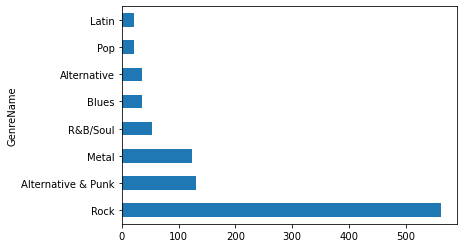

In [61]:
genre["TotalSale"].plot.barh()

<AxesSubplot:title={'center':'USA Sale'}, ylabel='GenreName'>

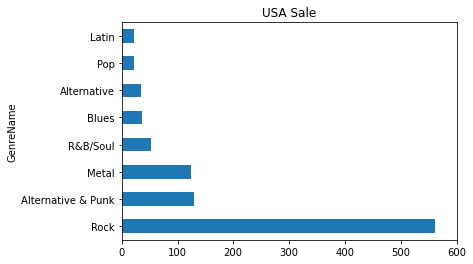

In [65]:
genre["TotalSale"].plot.barh(title="USA Sale",xlim=(0,600))


<AxesSubplot:title={'center':'USA Sale'}, ylabel='GenreName'>

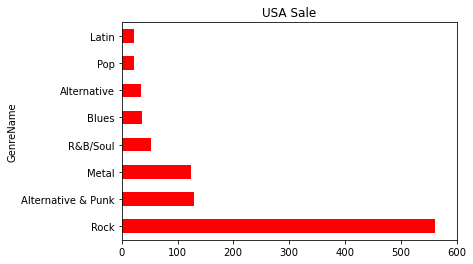

In [66]:
genre["TotalSale"].plot.barh(title="USA Sale",xlim=(0,600),color="r")


<AxesSubplot:title={'center':'USA Sale'}, ylabel='GenreName'>

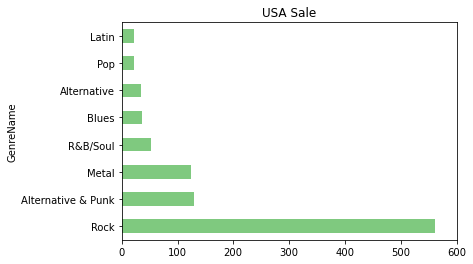

In [69]:
genre["TotalSale"].plot.barh(title="USA Sale",xlim=(0,600),colormap=plt.cm.Accent)


In [71]:
genre

,TotalSale,PercentageSale,CountryName
GenreName,,,
Rock,561,53.377735,USA
Alternative & Punk,130,12.369172,USA
Metal,124,11.798287,USA
R&B/Soul,53,5.042816,USA
Blues,36,3.425309,USA
Alternative,35,3.330162,USA
Pop,22,2.093245,USA
Latin,22,2.093245,USA


In [72]:
genre.loc["Rock","PercentageSale"]

53.37773549000951

In [73]:
genre.index

Index(['Rock', 'Alternative & Punk', 'Metal', 'R&B/Soul', 'Blues',
       'Alternative', 'Pop', 'Latin'],
      dtype='object', name='GenreName')

In [74]:
for i in genre.index:
    print(i)

Rock
Alternative & Punk
Metal
R&B/Soul
Blues
Alternative
Pop
Latin


In [81]:
for i in enumerate(genre.index):
    print(i)

(0, 'Rock')
(1, 'Alternative & Punk')
(2, 'Metal')
(3, 'R&B/Soul')
(4, 'Blues')
(5, 'Alternative')
(6, 'Pop')
(7, 'Latin')


In [77]:
for i in genre.index:
    print(genre.loc[i,"PercentageSale"])

53.37773549000951
12.369172216936251
11.798287345385347
5.042816365366318
3.425309229305423
3.3301617507136063
2.093244529019981
2.093244529019981


In [78]:
for i in genre.index:
    print(round(genre.loc[i,"PercentageSale"],2))

53.38
12.37
11.8
5.04
3.43
3.33
2.09
2.09


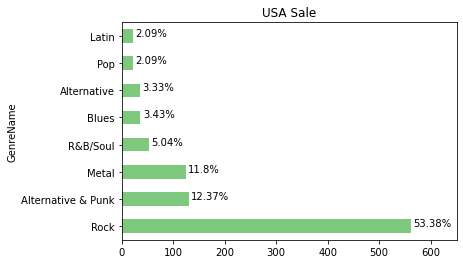

In [96]:
genre["TotalSale"].plot.barh(title="USA Sale",xlim=(0,650),colormap=plt.cm.Accent)
for i,g in enumerate(genre.index):
    label=str(round(genre.loc[g,"PercentageSale"],2))+"%"
    x=genre.loc[g,"TotalSale"]
    plt.annotate(label,(x+5,i))
#x+5 this add some space
#(x+5,i) (x-axis,y-axis)   

In [4]:
genre["TotalSale"].plot.barh(title="USA Sale",xlim=(0,650),colormap=plt.cm.Accent)
for i,g in enumerate(genre.index):
    label=str(round(genre.loc[g,"PercentageSale"],2))+"%"
    x=genre.loc[g,"TotalSale"]
    plt.annotate(label,(x+5,i))
    plt.ylabel("")
#x+5 this add some space
#(x+5,i) (x-axis,y-axis)   

NameError: name 'genre' is not defined

# find the total sale of 3 sale support person

In [33]:
q="""with MainQuery as(select e.first_name ||''|| e.last_name EmployeeName,e.hire_date HireDate,i.total Total from employee e
inner join customer c
on
e.employee_id=c.support_rep_id
inner join invoice i
on
c.customer_id=i.customer_id)

select  distinct(EmployeeName) from MainQuery

"""

read_sql(q)
   
        

,EmployeeName
0,JanePeacock
1,SteveJohnson
2,MargaretPark


In [35]:
q="""with MainQuery as(select e.first_name ||''|| e.last_name EmployeeName,e.hire_date HireDate,i.total Total from employee e
inner join customer c
on
e.employee_id=c.support_rep_id
inner join invoice i
on
c.customer_id=i.customer_id)

select EmployeeName ,HireDate,Total from MainQuery

"""

read_sql(q)
   
        

,EmployeeName,HireDate,Total
0,JanePeacock,2017-04-01 00:00:00,15.84
1,JanePeacock,2017-04-01 00:00:00,9.90
2,MargaretPark,2017-05-03 00:00:00,1.98
3,JanePeacock,2017-04-01 00:00:00,7.92
4,MargaretPark,2017-05-03 00:00:00,16.83
...,...,...,...
609,MargaretPark,2017-05-03 00:00:00,6.93
610,JanePeacock,2017-04-01 00:00:00,1.98
611,JanePeacock,2017-04-01 00:00:00,11.88
612,MargaretPark,2017-05-03 00:00:00,8.91


In [36]:
q="""with MainQuery as(select e.first_name ||''|| e.last_name EmployeeName,e.hire_date HireDate,i.total Total from employee e
inner join customer c
on
e.employee_id=c.support_rep_id
inner join invoice i
on
c.customer_id=i.customer_id)

select EmployeeName ,HireDate,Total from MainQuery
group by 1

"""

read_sql(q)
   
        

,EmployeeName,HireDate,Total
0,JanePeacock,2017-04-01 00:00:00,15.84
1,MargaretPark,2017-05-03 00:00:00,1.98
2,SteveJohnson,2017-10-17 00:00:00,1.98


In [38]:
q="""with MainQuery as(select e.first_name ||''|| e.last_name EmployeeName,e.hire_date HireDate,i.total Total from employee e
inner join customer c
on
e.employee_id=c.support_rep_id
inner join invoice i
on
c.customer_id=i.customer_id)

select EmployeeName ,HireDate,sum(Total) TotalSale from MainQuery
group by 1

"""

read_sql(q)
   
        

,EmployeeName,HireDate,TotalSale
0,JanePeacock,2017-04-01 00:00:00,1731.51
1,MargaretPark,2017-05-03 00:00:00,1584.00
2,SteveJohnson,2017-10-17 00:00:00,1393.92


In [40]:
q="""with MainQuery as(select e.first_name ||''|| e.last_name EmployeeName,e.hire_date HireDate,i.total Total from employee e
inner join customer c
on
e.employee_id=c.support_rep_id
inner join invoice i
on
c.customer_id=i.customer_id)

select EmployeeName ,HireDate,sum(Total) TotalSale from MainQuery
group by 1
order by 3 desc 

"""

read_sql(q)
   
        

,EmployeeName,HireDate,TotalSale
0,JanePeacock,2017-04-01 00:00:00,1731.51
1,MargaretPark,2017-05-03 00:00:00,1584.00
2,SteveJohnson,2017-10-17 00:00:00,1393.92


In [42]:
((1731.51-1393.92)/1731.51)*100

19.496855345911946

In [43]:
((1731.51-1584.00)/1731.51)*100

8.51915380217267

In [44]:
q='''pragma table_info(employee)'''
read_sql(q)

,cid,name,type,notnull,dflt_value,pk
0,0,employee_id,INTEGER,1,None,1
1,1,last_name,NVARCHAR(20),1,None,0
2,2,first_name,NVARCHAR(20),1,None,0
3,3,title,NVARCHAR(30),0,None,0
4,4,reports_to,INTEGER,0,None,0
5,5,birthdate,DATETIME,0,None,0
6,6,hire_date,DATETIME,0,None,0
7,7,address,NVARCHAR(70),0,None,0
8,8,city,NVARCHAR(40),0,None,0
9,9,state,NVARCHAR(40),0,None,0


In [46]:
read_sql('''pragma table_info(employee)''')

,cid,name,type,notnull,dflt_value,pk
0,0,employee_id,INTEGER,1,None,1
1,1,last_name,NVARCHAR(20),1,None,0
2,2,first_name,NVARCHAR(20),1,None,0
3,3,title,NVARCHAR(30),0,None,0
4,4,reports_to,INTEGER,0,None,0
5,5,birthdate,DATETIME,0,None,0
6,6,hire_date,DATETIME,0,None,0
7,7,address,NVARCHAR(70),0,None,0
8,8,city,NVARCHAR(40),0,None,0
9,9,state,NVARCHAR(40),0,None,0


# call jen

In [57]:
q="""select first_name||' '|| last_name Name ,phone,email from customer where first_name like '%jen' """
read_sql(q)

,Name,phone,email


In [55]:
q="""select first_name||' '|| last_name Name ,phone,email from customer where first_name like 'jen%' """
read_sql(q)

,Name,phone,email
0,Jennifer Peterson,+1 (604) 688-2255,jenniferp@rogers.ca


# find the total issue invoice

In [66]:
q='''select distinct(invoice_id) invoice from invoice '''
read_sql(q)

,invoice
0,16
1,77
2,149
3,153
4,182
...,...
609,121
610,155
611,220
612,599


# find the total sale of every country, and total customer of each country(no repetition) and avergae order of each counry

# managment decided to fetch popular track 
**but as a data scientist we work to find the sale of both album and track
which customer buy more track or album**